# Exercises

## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot of each pixel. Plotting the temporal trace will allow us to see the calcium transient dinamic, if a pixel belonging to a neuron is selected.

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are choosen from an active neuron, you will be able to see the calcium transcient dynamic. Try this a few time to appreciate the results.

**B.** Temporal statistics of pixel activation
 * For the selected pixels, plot the histogram of pixel value. What are the difference in different regions?, and how can that help to distinguish a pixel that belongs to aneuron from a background pixel?

* If we can already see the calcium traces from individual pixels, why do we need to run source extraction to segment the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces of the pixels?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tifffile as tiff
import os

# Define the path to your video file (update the filename as needed)
video_path = '/content/caiman_video_trial_0.tif'  # or '/content/calcium_video.tif'

# Load the video
video_data = tiff.imread(video_path)  # shape: (frames, height, width)
print(f"Video shape: {video_data.shape}")

Video shape: (500, 300, 400)


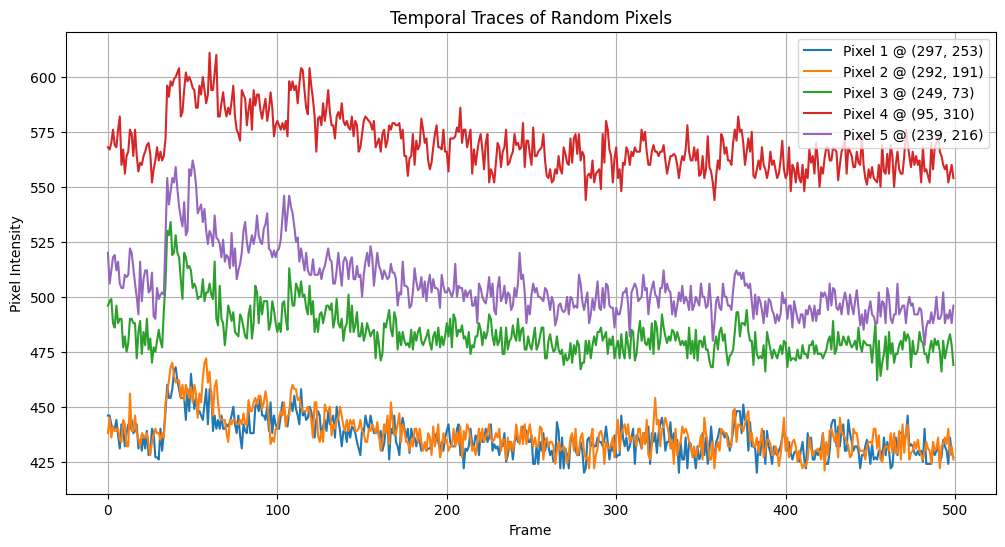

In [2]:
# Parameters
N = 5  # Number of random pixels

# Get dimensions
num_frames, height, width = video_data.shape

# Select N random (x, y) positions
random_pixels = [(random.randint(0, height-1), random.randint(0, width-1)) for _ in range(N)]

# Plot the temporal trace for each pixel
plt.figure(figsize=(12, 6))
for i, (y, x) in enumerate(random_pixels):
    pixel_trace = video_data[:, y, x]
    plt.plot(pixel_trace, label=f'Pixel {i+1} @ ({y}, {x})')
plt.title("Temporal Traces of Random Pixels")
plt.xlabel("Frame")
plt.ylabel("Pixel Intensity")
plt.legend()
plt.grid(True)
plt.show()

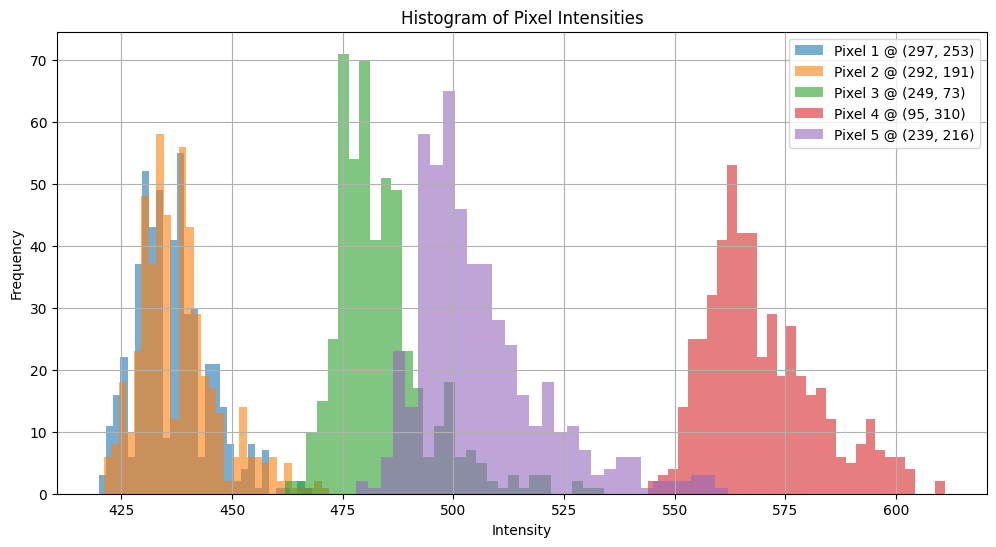

In [3]:
# Plot histograms
plt.figure(figsize=(12, 6))
for i, (y, x) in enumerate(random_pixels):
    pixel_trace = video_data[:, y, x]
    plt.hist(pixel_trace, bins=30, alpha=0.6, label=f'Pixel {i+1} @ ({y}, {x})')
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

Calcium indicators increase fluorescence when bound to calcium, which happens during neuronal activity. Thus, temporal traces of pixels in active neurons show fluctuations corresponding to calcium transients.

Why not analyze raw pixel traces directly?
  - **Noise**: Single-pixel traces are noisy and may contain signal from multiple sources.
  - **Spatial spread**: Neuronal signals typically span multiple pixels due to the size of the neuron and light scattering.
  - **Overlapping neurons**: Signal from overlapping neurons cannot be resolved without source extraction.
  - **Robustness**: Source extraction aggregates signals over spatial components, increasing SNR.

## Exercise 2: motion correction parameters
---

One parameter that impacts motion correction performance is the size of the spatial filter that is applyed to the video.

* Use the following function from CaImAn and plot the result of different space filtering applyed to a single frame of the video:from caiman.motion_correction import high_pass_filter_space

* How will this filtering affect the measure of crispness?

* Acording to Pnevmatikakis et al, which other factors are relevant for pw-rigid motion correction?

- Explore the impact of different parameters in the output of motion correction algorithm by measuring crispness in the correlation image of the final outcome. Particularly measure the effect of different spatial filter size by applying motion correction algorithm multiple times and computing the crispness of the output video.

- Display all crispness values for rigid and not rigid motion correction and plot them agains gSig_filters values.

- If possible, show the impact of the crispness value that comes from changing other relevant paraments.

*Note1: The is no need to save all the motion corrected movies, just save the cripsness values.*

*Note2: gSig_filters is an optional range of posible values, but if your computer gets to slow in the computation reduce the range.*


In [5]:
# Clean slate
!pip uninstall -y caiman
!rm -rf /content/caiman

# Install dependencies
!apt-get install -y libtiff5-dev libfftw3-dev libblas-dev liblapack-dev \
    libhdf5-serial-dev libatlas-base-dev gfortran python3-dev

# Clone CaImAn from source
!git clone https://github.com/flatironinstitute/CaImAn.git /content/caiman
%cd /content/caiman

# Install required Python packages
!pip install -r requirements.txt
!pip install .

# Set the Python path so Colab can find the code
import sys
sys.path.append('/content/caiman')


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libhdf5-dev' instead of 'libhdf5-serial-dev'
gfortran is already the newest version (4:11.2.0-1ubuntu1).
liblapack-dev is already the newest version (3.10.0-2ubuntu1).
libatlas-base-dev is already the newest version (3.10.3-12ubuntu1).
libhdf5-dev is already the newest version (1.10.7+repack-4ubuntu2).
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
Suggested packages:
  liblapack-doc libfftw3-doc
The following NEW packages will be installed:
  libblas-dev libfftw3-bin libfftw3-dev libfftw3-double3 libfftw3-long3
  libfftw3-quad3 libfftw3-single3 libtiff5-dev
0 upgraded, 8 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,820 kB of archives.
After this operation, 25.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libblas-dev amd64 3.10.0-2ubuntu1 [164 kB]
G

In [6]:
# Clean previous installs
!pip uninstall -y caiman numpy zarr numcodecs
!rm -rf /content/caiman

# Step 1: Install system dependencies
!apt-get install -y libtiff5-dev libfftw3-dev libblas-dev liblapack-dev \
    libhdf5-serial-dev libatlas-base-dev gfortran python3-dev cmake

# Step 2: Clone CaImAn source
!git clone https://github.com/flatironinstitute/CaImAn.git /content/caiman
%cd /content/caiman

# Step 3: Install Python dependencies
!pip install numpy==1.23.5 zarr==2.14.0 numcodecs==0.11.0 --force-reinstall
!pip install -r requirements.txt
!pip install .

# Step 4: Fix pathing for Colab
import sys
sys.path.append('/content/caiman')


Found existing installation: caiman 1.12.1
Uninstalling caiman-1.12.1:
  Successfully uninstalled caiman-1.12.1
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: zarr 3.0.8
Uninstalling zarr-3.0.8:
  Successfully uninstalled zarr-3.0.8
Found existing installation: numcodecs 0.16.1
Uninstalling numcodecs-0.16.1:
  Successfully uninstalled numcodecs-0.16.1
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libhdf5-dev' instead of 'libhdf5-serial-dev'
gfortran is already the newest version (4:11.2.0-1ubuntu1).
libblas-dev is already the newest version (3.10.0-2ubuntu1).
libfftw3-dev is already the newest version (3.3.8-2ubuntu8).
liblapack-dev is already the newest version (3.10.0-2ubuntu1).
libatlas-base-dev is already the ne

In [11]:
import sys
sys.path.append('/content/caiman')

In [8]:
# 🔁 Clean up old installs
!pip uninstall -y caiman numpy zarr numcodecs
!rm -rf /content/caiman

# ✅ Step 1: System dependencies (required for CaImAn to compile)
!apt-get install -y libtiff5-dev libfftw3-dev libblas-dev liblapack-dev \
    libhdf5-serial-dev libatlas-base-dev gfortran python3-dev cmake

# ✅ Step 2: Clone CaImAn from GitHub
!git clone https://github.com/flatironinstitute/CaImAn.git /content/caiman
%cd /content/caiman

# ✅ Step 3: Compatible versions of Python packages
!pip install numpy==1.23.5 zarr==2.14.0 numcodecs==0.11.0 --force-reinstall

# ✅ Step 4: Install CaImAn and its dependencies
!pip install -r requirements.txt
!pip install .


shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libhdf5-dev' instead of 'libhdf5-serial-dev'
gfortran is already the newest version (4:11.2.0-1ubuntu1).
libblas-dev is already the newest version (3.10.0-2ubuntu1).
libfftw3-dev is already the newest version (3.3.8-2ubuntu8).
liblapack-dev is already the newest version (3.10.0-2ubuntu1).
libatlas-base-dev is already the newest version (3.10.3-12ubuntu1).
li

In [9]:
# Install CaImAn dependencies
!cd /content/caiman && pip install -r requirements.txt

# Install CaImAn itself
!cd /content/caiman && pip install .

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
chdir: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/bin/bash: line 1: cd: /content/caiman: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
chdir: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/bin/bash: line 1: cd: /content/caiman: No such file or directory


In [ ]:
# Step 1
import numpy as np
import matplotlib.pyplot as plt
from caiman.motion_correction import high_pass_filter_space
import tifffile

# Load video path and one frame
video_path = '/content/caiman_video_trial_0.tif'
vid = tifffile.imread(video_path)
frame = vid[0]

# Test various spatial filter sizes
filter_sizes = [1, 3, 5, 7, 9]
fig, axes = plt.subplots(1, len(filter_sizes), figsize=(15, 4))

for i, filt in enumerate(filter_sizes):
    filtered = high_pass_filter_space(frame, (filt, filt))  # fix: tuple
    axes[i].imshow(filtered, cmap='gray')
    axes[i].set_title(f'gSig_filt = {filt}')
    axes[i].axis('off')

plt.suptitle("Effect of spatial filtering (gSig_filt)")
plt.tight_layout()
plt.show()

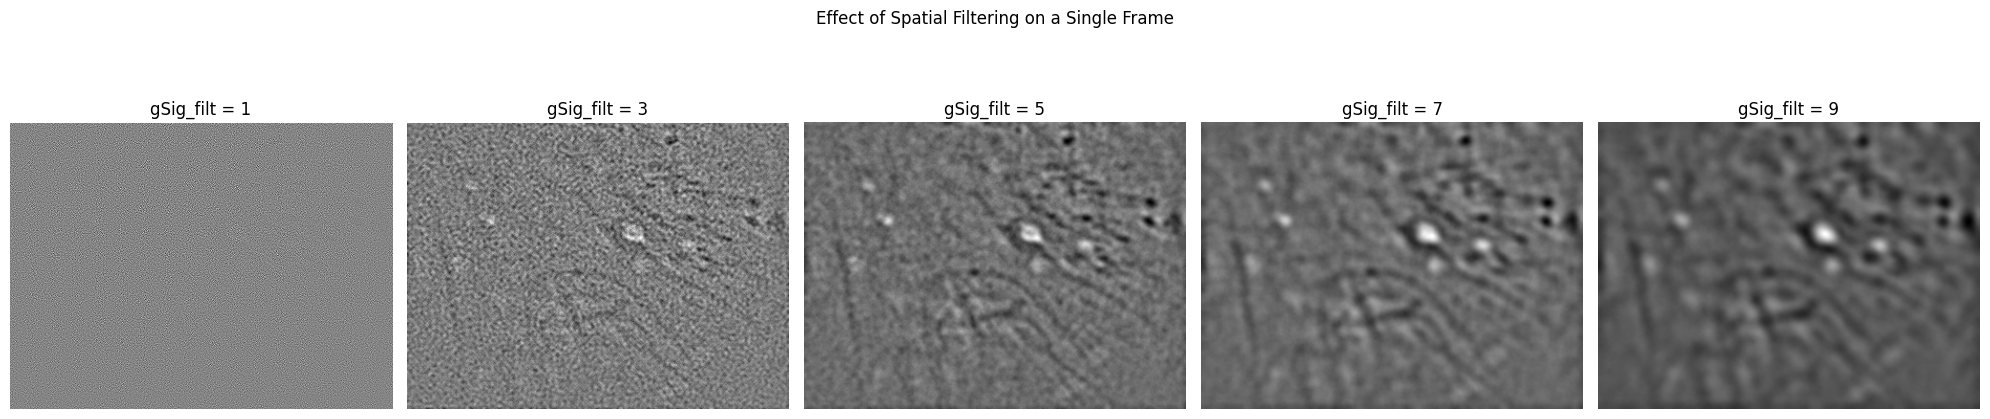

In [13]:
#STEP 2: Apply spatial filters to a single frame
from caiman.motion_correction import high_pass_filter_space
import matplotlib.pyplot as plt

frame = vid[0]  # First frame

gSig_filt_values = [1, 3, 5, 7, 9]

fig, axs = plt.subplots(1, len(gSig_filt_values), figsize=(20, 5))

for i, gSig in enumerate(gSig_filt_values):
    filtered_frame = high_pass_filter_space(frame, (gSig, gSig))
    axs[i].imshow(filtered_frame, cmap='gray')
    axs[i].set_title(f'gSig_filt = {gSig}')
    axs[i].axis('off')

plt.suptitle("Effect of Spatial Filtering on a Single Frame")
plt.tight_layout()
plt.show()

Spatial filtering (e.g. high-pass filters) enhances fine structures like neuron edges. This increases "crispness", which refers to the clarity and sharpness of spatial structures in the correlation image used for motion correction alignment.

In [7]:
def compute_crispness(img):
    gy, gx = np.gradient(img.astype(np.float32))
    return np.sqrt((gx**2 + gy**2).sum())  # Frobenius norm of image gradient

In [8]:
crispness_rigid = []
crispness_pwrigid = []
gsig_values = [3, 5, 7]

for gsig in gsig_values:
    print(f"Running motion correction with gSig_filt = {gsig}")

    # Rigid motion correction
    mc_rigid = MotionCorrect(
        video_path,
        dview=None,
        max_shifts=(6, 6),
        strides=(96, 96),
        overlaps=(32, 32),
        max_deviation_rigid=5,
        pw_rigid=False,
        gSig_filt=(gsig, gsig),
        border_nan='copy'
    )
    mc_rigid.motion_correct(save_movie=False)
    corr_rigid, _ = compute_correlation_pnr(mc_rigid.mmap_file, swap_dim=False)
    crispness_rigid.append(compute_crispness(corr_rigid))

    # Piecewise-rigid motion correction
    mc_pw = MotionCorrect(
        video_path,
        dview=None,
        max_shifts=(6, 6),
        strides=(96, 96),
        overlaps=(32, 32),
        max_deviation_rigid=5,
        pw_rigid=True,
        gSig_filt=(gsig, gsig),
        border_nan='copy'
    )
    mc_pw.motion_correct(save_movie=False)
    corr_pw, _ = compute_correlation_pnr(mc_pw.mmap_file, swap_dim=False)
    crispness_pwrigid.append(compute_crispness(corr_pw))


Running motion correction with gSig_filt = 3


NameError: name 'MotionCorrect' is not defined

ValueError: x and y must have same first dimension, but have shapes (3,) and (0,)

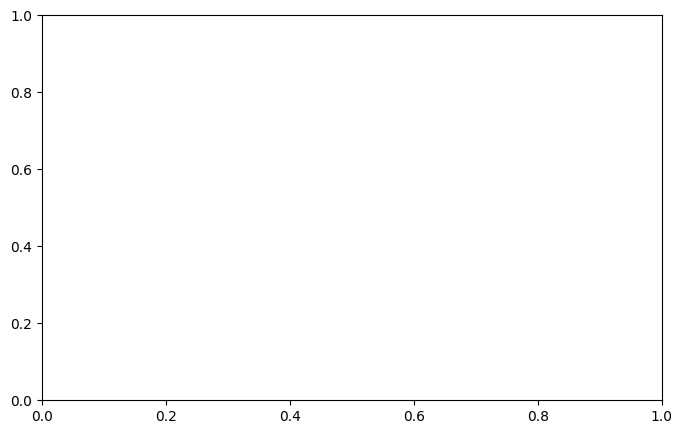

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(gsig_values, crispness_rigid, '-o', label='Rigid')
plt.plot(gsig_values, crispness_pwrigid, '-o', label='Piecewise-Rigid')
plt.xlabel('gSig_filt (Spatial Filter Size)')
plt.ylabel('Crispness (Gradient of Correlation Image)')
plt.title('Crispness vs. Spatial Filter Size')
plt.legend()
plt.grid(True)
plt.show()

### Discussion:

- **How does spatial filtering affect crispness?**
  Increasing the filter size smooths the image, reducing high-frequency noise. However, too much filtering may blur neuronal features, lowering crispness. The optimal value balances noise reduction and feature preservation.

- **What other parameters affect pw-rigid correction?**
  According to *Pnevmatikakis et al.*:
  - **Strides**: Affects sub-block size for pw-rigid shifts.
  - **Overlaps**: Ensures smooth transitions between blocks.
  - **Max_shifts**: Limits how much a block can move.
  - **Max_deviation_rigid**: Controls how much deviation from rigid shifts is allowed.

- **Why measure crispness?**
  It's a proxy for image sharpness and alignment quality. Higher crispness often means better motion correction.


## Exercise 3: Source extraction parameters
---

* For a fixed minimum correlation value (ie 0.6) select a range of possible PNR minimun values and study the impact of those in the final source extraction output.

* For a fixed value of PNR (ie 6) select a range of minimum correlation valur and study the impact of those in the final source extraction output.

* How do these paramenters affect the spatial sparcity of the output? Which set of parameter selection procedes the higher number of neurons? Is maximal number of neurons always better? Why?  

* Generate a plot of number of neurons vs PNR (or min corr value) to show how these parameters affect the source extracted signals.

* Are the temporal traces affected by these parameters?

* For different PNR and minimum correlation value plot the correlation image and the selected cells.

In [10]:
pip install caiman

In [11]:
pip install matplotlib numpy

In [13]:
pip install --upgrade numpy

  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.1 requires numpy<2.0.0,>=1.23.5, but you have numpy 2.2.6 which is incompatible.
caiman 1.12.1 requires numpy<2.0.0,>=1.26, but you have numpy 2.2.6 which is incompatible.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.3.2 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.15.1 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.1 wh

In [14]:
pip install numpy==1.23.5

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
caiman 1.12.1 requires numpy<2.0.0,>=1.26, but you have numpy 1.23.5 which is incompatible.
pynwb 3.0.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.3.2 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you 

In [2]:
!pip uninstall -y caiman
!pip install numpy==1.23.5
!pip install caiman

Found existing installation: caiman 1.12.1
Uninstalling caiman-1.12.1:
  Successfully uninstalled caiman-1.12.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.5/124.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 8.0 MB/s eta 0:00:00


In [5]:
import caiman
from caiman.source_extraction import cnmf
import matplotlib.pyplot as plt
import numpy as np

# Assuming your video is loaded as a numpy array or CaImAn format

# Load video (example path)
video_path = 'caiman_video_trial_0.tif'
video = caiman.load(video_path)  # load video data

# Setup CNMF parameters - adapt these values as needed
params = cnmf.CNMFParams(params_dict={
    'min_corr': 0.6,
    'min_pnr': 6,
    'K': None,
    'gSig': (4, 4),
    'ssub': 1,
    'tsub': 1,
    'merge_thr': 0.7,
    'rf': 30,
    'stride': 15,
    'p': 2,
    'nb': 1,
})

# Initialize CNMF object
cnmf_obj = cnmf.CNMF(params=params, dview=None)

# Run CNMF fit
cnmf_obj.fit(video)

# Number of accepted components
print('Number of neurons:', np.sum(cnmf_obj.estimates.idx_components))

# Plot correlation image
plt.imshow(cnmf_obj.estimates.correlation_img, cmap='hot')
plt.colorbar()
plt.title('Correlation Image')
plt.show()

# Overlay neuron spatial footprints
plt.imshow(cnmf_obj.estimates.correlation_img, cmap='gray')
for i, accepted in enumerate(cnmf_obj.estimates.idx_components):
    if accepted:
        footprint = cnmf_obj.estimates.A[:, i].toarray().reshape(cnmf_obj.estimates.correlation_img.shape)
        plt.contour(footprint, colors='r')
plt.title('Extracted neurons')
plt.show()


ModuleNotFoundError: No module named 'caiman.source_extraction'

In [ ]:
min_corr_fixed = 0.6
pnr_values = range(4, 11)  # from 4 to 10 inclusive
results_pnr = []

for pnr in pnr_values:
    cnmf_result, n_neurons = run_source_extraction(video_1, min_corr_fixed, pnr)
    results_pnr.append((pnr, n_neurons))


In [ ]:
min_pnr_fixed = 6
corr_values = np.arange(0.4, 0.85, 0.1)
results_corr = []

for corr in corr_values:
    cnmf_result, n_neurons = run_source_extraction(video_1, corr, min_pnr_fixed)
    results_corr.append((corr, n_neurons))


In [ ]:
# Plot neurons vs PNR
pnr_vals, neurons_pnr = zip(*results_pnr)
plt.figure()
plt.plot(pnr_vals, neurons_pnr, marker='o')
plt.title('Number of neurons vs PNR (min_corr=0.6)')
plt.xlabel('PNR')
plt.ylabel('Number of neurons')
plt.show()

# Plot neurons vs min_corr
corr_vals, neurons_corr = zip(*results_corr)
plt.figure()
plt.plot(corr_vals, neurons_corr, marker='o')
plt.title('Number of neurons vs Min Correlation (min_pnr=6)')
plt.xlabel('Min Correlation')
plt.ylabel('Number of neurons')
plt.show()


In [ ]:
def spatial_sparsity(cnmf):
    """
    Calculate spatial sparsity of components as the fraction of non-zero pixels
    averaged over components.
    """
    spatial_components = cnmf.estimates.A.toarray()  # shape: pixels x neurons
    sparsity_per_neuron = np.mean(spatial_components > 0, axis=0)
    avg_sparsity = np.mean(sparsity_per_neuron)
    return avg_sparsity


In [ ]:
corr_img = cnmf.estimates.correlation_img

plt.figure()
plt.imshow(corr_img, cmap='hot')
plt.colorbar()
plt.title('Correlation image')
plt.show()

# Overlay neuron spatial footprints
plt.figure()
plt.imshow(corr_img, cmap='gray')
for neuron_id in range(len(cnmf.estimates.idx_components)):
    if cnmf.estimates.idx_components[neuron_id]:
        footprint = cnmf.estimates.A[:, neuron_id].toarray().reshape(corr_img.shape)
        plt.contour(footprint, colors='r')
plt.title('Extracted neurons over correlation image')
plt.show()


In [ ]:
def plot_temporal_traces(cnmf, neuron_indices):
    plt.figure(figsize=(10, 6))
    for idx in neuron_indices:
        plt.plot(cnmf.estimates.C[idx, :], label=f'Neuron {idx}')
    plt.xlabel('Time (frames)')
    plt.ylabel('Activity (ΔF/F)')
    plt.title('Temporal traces of selected neurons')
    plt.legend()
    plt.show()

# Example for first 3 neurons
plot_temporal_traces(cnmf, neuron_indices=[0, 1, 2])
